In [4]:
import numpy as np
import matplotlib.pyplot as plt
from smt.surrogate_models import KRG

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 5
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0399218
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0008864
   
   Prediction time/pt. (sec) :  0.0000089
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 5
   
   Predicting ...
   Predicting - done. Time (sec):  0.0002172
   
   Prediction time/pt. (sec) :  0.0000434
   


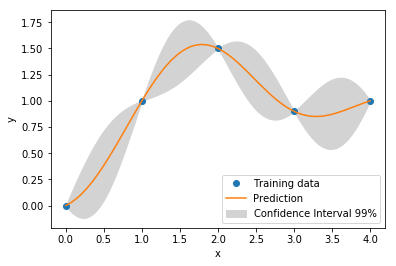

In [5]:
xt = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
yt = np.array([0.0, 1.0, 1.5, 0.9, 1.0])

sm = KRG(theta0=[1e-2])
sm.set_training_values(xt, yt)
sm.train()

num = 100
x = np.linspace(0.0, 4.0, num)
y = sm.predict_values(x)
# estimated variance
s2 = sm.predict_variances(x)
# derivative according to the first variable
dydx = sm.predict_derivatives(xt, 0)
fig, axs = plt.subplots(1)

# add a plot with variance
axs.plot(xt, yt, "o")
axs.plot(x, y)
axs.fill_between(
    np.ravel(x),
    np.ravel(y - 3 * np.sqrt(s2)),
    np.ravel(y + 3 * np.sqrt(s2)),
    color="lightgrey",
)
axs.set_xlabel("x")
axs.set_ylabel("y")
axs.legend(
    ["Training data", "Prediction", "Confidence Interval 99%"],
    loc="lower right",
)

plt.show()